# Metaclass
### Most of the time we do not use metaclasses, it’s usually used for something complicated, but a few cases where we use metaclasses are – 
### As we have seen in the above example, metaclasses propagate down the inheritance hierarchies. It will affect all the subclasses as well. If we have such a situation, then we should use metaclasses.
### If we want to change class automatically, when it is created, we use metaclasses
### For API development, we might use metaclasses

In [1]:
class test:pass
 
# Defining method variables
test.x = 45
 
# Defining class methods
test.foo = lambda self: print('Hello')
 
# creating object
myobj = test()
 
print(myobj.x)
myobj.foo()

45
Hello


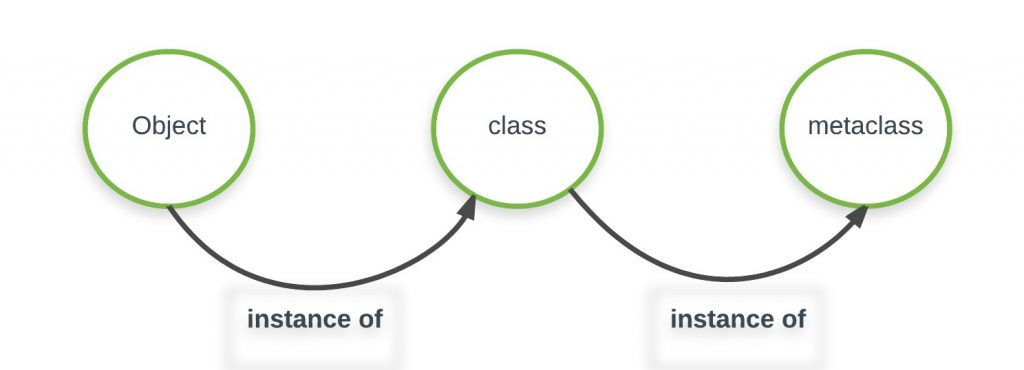

In [2]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/metaclass-hierarchy-Page-1-1024x370.jpeg")

### The metaclass is responsible for the generation of classes, so we can write our custom metaclasses to modify the way classes are generated by performing extra actions or injecting code. Usually, we do not need custom metaclasses but sometimes it’s necessary. 

### __new__(): It’s a method which is called before __init__(). It creates the object and returns it. We can override this method to control how the objects are created.
### __init__(): This method just initialize the created object passed as a parameter

In [6]:
class MultiBases(type):
    # overriding __new__ method
    def __new__(cls, clsname, bases, clsdict):
        # if no of base classes is greater than 1
        # raise error
        if len(bases)>1:
            raise TypeError("Inherited multiple base classes!!!")
         
        # else execute __new__ method of super class, ie.
        # call __init__ of type class
        return super().__new__(cls, clsname, bases, clsdict)

# metaclass can be specified by 'metaclass' keyword argument
# now MultiBase class is used for creating classes
# this will be propagated to all subclasses of Base
class Base(metaclass=MultiBases):
    pass

# no error is raised
class A(Base):
    pass

# no error is raised
class B(Base):
    pass

In [7]:
# This will raise an error!
# We have modified how the class is created.
class C(A, B):
    pass

TypeError: Inherited multiple base classes!!!

In [13]:
# decorator method works but it has its disadvantage such as code repetition that can be achieved by metaclass.
# if we want to let other class inherit Calc, we have to repeat the decorator.

In [12]:
from functools import wraps
 
def debug(func):
    '''decorator for debugging passed function'''
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("Full name of this method:", func.__qualname__)
        return func(*args, **kwargs)
    return wrapper
 
def debugmethods(cls):
    '''class decorator make use of debug decorator
       to debug class methods '''
    # check in class dictionary for any callable(method)
    # if exist, replace it with debugged version
    for key, val in vars(cls).items():
        if callable(val):
            setattr(cls, key, debug(val))
    return cls
 
# sample class
@debugmethods
class Calc:
    def add(self, x, y):
        return x+y
    def mul(self, x, y):
        return x*y
    def div(self, x, y):
        return x/y
     
mycal = Calc()
print(mycal.add(2, 3))
print(mycal.mul(5, 2))

Full name of this method: Calc.add
5
Full name of this method: Calc.mul
10


In [9]:
from functools import wraps
 
def debug(func):
    '''decorator for debugging passed function'''
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("Full name of this method:", func.__qualname__)
        return func(*args, **kwargs)
    return wrapper
 
def debugmethods(cls):
    '''class decorator make use of debug decorator
       to debug class methods '''
    for key, val in vars(cls).items():
        if callable(val):
            setattr(cls, key, debug(val))
    return cls
 
class debugMeta(type):
    '''meta class which feed created class object
       to debugmethod to get debug functionality
       enabled objects'''
    def __new__(cls, clsname, bases, clsdict):
        obj = super().__new__(cls, clsname, bases, clsdict)
        obj = debugmethods(obj)
        return obj
     
# base class with metaclass 'debugMeta'
# now all the subclass of this
# will have debugging applied
class Base(metaclass=debugMeta):pass
 
# inheriting Base
class Calc(Base):
    def add(self, x, y):
        return x+y
     
# inheriting Calc
class Calc_adv(Calc):
    def mul(self, x, y):
        return x*y
 
# Now Calc_adv object showing
# debugging behaviour
mycal = Calc_adv()
print(mycal.mul(2, 3))

Full name of this method: Calc_adv.mul
6
